In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(
        'https://data.stadt-zuerich.ch/dataset/sid_dav_verkehrszaehlung_miv_od2031/download/sid_dav_verkehrszaehlung_miv_OD2031_2024.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653197 entries, 0 to 653196
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MSID                653197 non-null  object 
 1   MSName              653197 non-null  object 
 2   ZSID                653197 non-null  object 
 3   ZSName              653197 non-null  object 
 4   Achse               653197 non-null  object 
 5   HNr                 653197 non-null  object 
 6   Hoehe               653197 non-null  object 
 7   EKoord              653197 non-null  float64
 8   NKoord              653197 non-null  float64
 9   Richtung            653197 non-null  object 
 10  Knummer             653197 non-null  int64  
 11  Kname               653197 non-null  object 
 12  AnzDetektoren       653197 non-null  int64  
 13  D1ID                653197 non-null  int64  
 14  D2ID                653197 non-null  object 
 15  D3ID                653197 non-nul

for more on variables see <https://data.stadt-zuerich.ch/dataset/sid_dav_verkehrszaehlung_miv_od2031#dataset>

## stations

In [6]:
# number of stations
df.MSID.nunique()

203

In [14]:
# stations seperately
df_stations = df.copy().drop_duplicates('MSID')
df_stations.drop(['MessungDatZeit', 'LieferDat', 'AnzFahrzeuge',
       'AnzFahrzeugeStatus'], axis=1, inplace=True)
df_stations

,MSID,MSName,ZSID,ZSName,Achse,HNr,Hoehe,EKoord,NKoord,Richtung,Knummer,Kname,AnzDetektoren,D1ID,D2ID,D3ID,D4ID
0,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.890,1243936.200,auswärts,789,Badanstalt Wollishofen,1,2,Unbekannt,Unbekannt,Unbekannt
3239,Z001M002,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683013.180,1243937.640,einwärts,789,Badanstalt Wollishofen,1,1,Unbekannt,Unbekannt,Unbekannt
6478,Z002M001,Unbekannt,Z002,Albisstrasse (Widmerstrasse),Albisstrasse,152,Unbekannt,2682480.510,1243162.500,auswärts,679,Albis-/Paradies-/Widmerstr (Schulweg),1,13,Unbekannt,Unbekannt,Unbekannt
9717,Z002M002,Unbekannt,Z002,Albisstrasse (Widmerstrasse),Albisstrasse,152,Unbekannt,2682484.910,1243162.410,einwärts,679,Albis-/Paradies-/Widmerstr (Schulweg),1,14,Unbekannt,Unbekannt,Unbekannt
12956,Z003M001,Unbekannt,Z003,Sood-/Leimbachstrasse,Soodstrasse,Unbekannt,Leimbachstrasse,2681573.790,1242969.910,auswärts,669,Leimbach-/Soodstr,1,16,Unbekannt,Unbekannt,Unbekannt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641322,Z106M001,Unbekannt,Z106,Zürichbergstrasse (Dreiwiesenstrasse),Zürichbergstrasse,Unbekannt,Wendeschlaufe Zoo,2685564.753,1248487.685,Zoo,560,Dreiwiesen-/Krähbühlstr (Wechselsignal-Steueru...,1,1,Unbekannt,Unbekannt,Unbekannt
643121,Z106M002,Unbekannt,Z106,Zürichbergstrasse (Dreiwiesenstrasse),Zürichbergstrasse,Unbekannt,Wendeschlaufe Zoo,2685565.376,1248500.950,einwärts,560,Dreiwiesen-/Krähbühlstr (Wechselsignal-Steueru...,1,2,Unbekannt,Unbekannt,Unbekannt
644920,Z107M003,Unbekannt,Z107,Dreiwiesenstrasse (Tobelhofstrasse),Dreiwiesenstrasse,Unbekannt,vor Tobelhofstrasse,2685813.765,1248154.018,auswärts,550,Tobelhof-/Dreiwiesenstrasse,1,30,Unbekannt,Unbekannt,Unbekannt
646719,Z107M004,Unbekannt,Z107,Dreiwiesenstrasse (Tobelhofstrasse),Dreiwiesenstrasse,Unbekannt,nach Tobelhofstrasse,2685812.581,1248158.685,Zoo,550,Tobelhof-/Dreiwiesenstrasse,1,18,Unbekannt,Unbekannt,Unbekannt


## traffic flow

In [16]:
# keep only subset to save memory
df = df[['MSID', 'MessungDatZeit', 'LieferDat', 'AnzFahrzeuge',
       'AnzFahrzeugeStatus']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653197 entries, 0 to 653196
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MSID                653197 non-null  object 
 1   MessungDatZeit      653197 non-null  object 
 2   LieferDat           653197 non-null  object 
 3   AnzFahrzeuge        613278 non-null  float64
 4   AnzFahrzeugeStatus  653197 non-null  object 
dtypes: float64(1), object(4)
memory usage: 24.9+ MB


In [41]:
df.loc[:,'MessungDatZeit'] = pd.to_datetime(df.MessungDatZeit, format='ISO8601')

In [42]:
# latest measurement
df.MessungDatZeit.max()

Timestamp('2024-05-14 23:00:00')

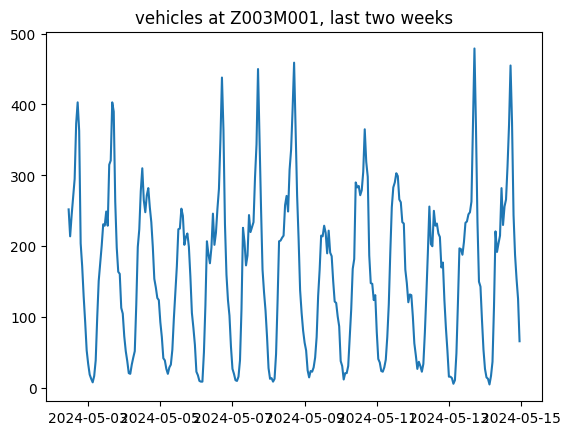

In [49]:
import matplotlib.pyplot as plt
import datetime 

STATION_ID = 'Z003M001' 
TIME_LIMIT = datetime.datetime.now() - datetime.timedelta(days = 14)

# plot one station
df_plot = df.loc[df.MSID == STATION_ID, :]
df_plot = df_plot[df_plot.MessungDatZeit > TIME_LIMIT]

plt.plot(df_plot.MessungDatZeit, df_plot.AnzFahrzeuge)
plt.title(f'vehicles at {STATION_ID}, last two weeks');

## prepare import

In [50]:
df = pd.read_csv(
        'https://data.stadt-zuerich.ch/dataset/sid_dav_verkehrszaehlung_miv_od2031/download/sid_dav_verkehrszaehlung_miv_OD2031_2024.csv',
    usecols=['MSID', 'MessungDatZeit', 'LieferDat', 'AnzFahrzeuge',
       'AnzFahrzeugeStatus'],
    parse_dates=['MessungDatZeit']
)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653197 entries, 0 to 653196
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   MSID                653197 non-null  object        
 1   MessungDatZeit      653197 non-null  datetime64[ns]
 2   LieferDat           653197 non-null  object        
 3   AnzFahrzeuge        613278 non-null  float64       
 4   AnzFahrzeugeStatus  653197 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 24.9+ MB


In [52]:
df

,MSID,MessungDatZeit,LieferDat,AnzFahrzeuge,AnzFahrzeugeStatus
0,Z001M001,2024-01-01 00:00:00,2024-05-15,178.0,Gemessen
1,Z001M001,2024-01-01 01:00:00,2024-05-15,380.0,Gemessen
2,Z001M001,2024-01-01 02:00:00,2024-05-15,143.0,Gemessen
3,Z001M001,2024-01-01 03:00:00,2024-05-15,81.0,Gemessen
4,Z001M001,2024-01-01 04:00:00,2024-05-15,70.0,Gemessen
...,...,...,...,...,...
653192,Z108M005,2024-05-14 19:00:00,2024-05-15,280.0,Gemessen
653193,Z108M005,2024-05-14 20:00:00,2024-05-15,177.0,Gemessen
653194,Z108M005,2024-05-14 21:00:00,2024-05-15,167.0,Gemessen
653195,Z108M005,2024-05-14 22:00:00,2024-05-15,168.0,Gemessen
